In [1]:
import pandas as pd
import os
import datetime as dt

import statsmodels.api as sm
#from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
file_path = '{}/nem-data/nemde_clean/df_DUID_CO2_mean.pkl'.format(os.environ['HOME'])
df_mean = pd.read_pickle(file_path)
print(df_mean.shape)
df_mean.head()

(1060704, 2)


,Price,CO2E_EMISSIONS_FACTOR
2019-08-01 03:55:00,79.52391,0.380340
2019-08-01 03:50:00,79.17710,0.456409
2019-08-01 03:45:00,85.14416,0.573436
2019-08-01 03:40:00,84.78689,0.573436
2019-08-01 03:35:00,84.78346,0.573436


In [5]:
df_mean1 = df_mean[(df_mean.index > dt.datetime(2018,3,1)) & (df_mean.index < dt.datetime(2018,6,1))]
df_mean2 = df_mean[(df_mean.index > dt.datetime(2019,5,1))]
df_mean3 = df_mean[(df_mean.index > dt.datetime(2018,12,1))]
df_mean4 = df_mean[(df_mean.index > dt.datetime(2018,10,1))]

In [6]:
#exchange NaNs by -1 as else plot_(p)acf not possible

df_mean1.CO2E_EMISSIONS_FACTOR.fillna(value=-1,inplace=True)
df_mean2.CO2E_EMISSIONS_FACTOR.fillna(value=-1,inplace=True)
df_mean3.CO2E_EMISSIONS_FACTOR.fillna(value=-1,inplace=True)
df_mean4.CO2E_EMISSIONS_FACTOR.fillna(value=-1,inplace=True)

/home/bastian/Environment/DSR_portfolio/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


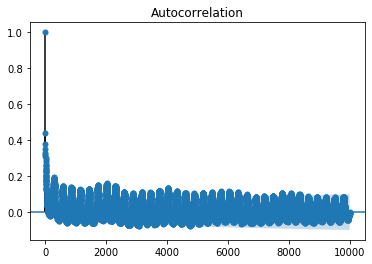

In [7]:
plot_acf(df_mean1.CO2E_EMISSIONS_FACTOR,lags=10000);

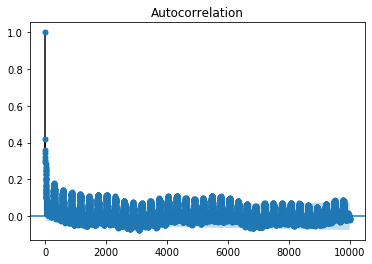

In [30]:
plot_acf(df_mean2.CO2E_EMISSIONS_FACTOR,lags=10000);

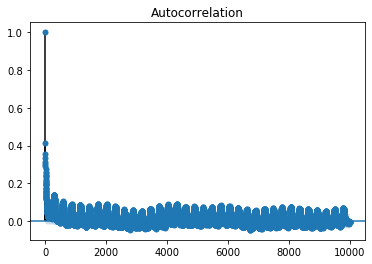

In [35]:
#note: the fact that NaNs were replaced by -1 appears to play a significant role in acf
plot_acf(df_mean3.CO2E_EMISSIONS_FACTOR,lags=10000);

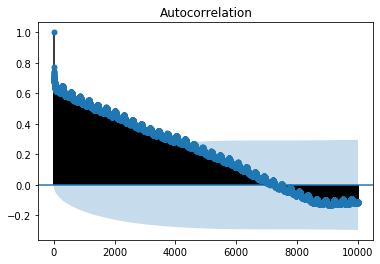

In [8]:
#note: the fact that NaNs were replaced by -1 appears to play a significant role in acf
plot_acf(df_mean4.CO2E_EMISSIONS_FACTOR,lags=10000);

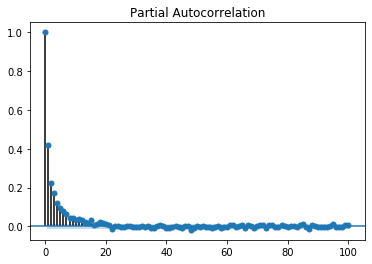

In [31]:
plot_pacf(df_mean2.CO2E_EMISSIONS_FACTOR,lags=100);

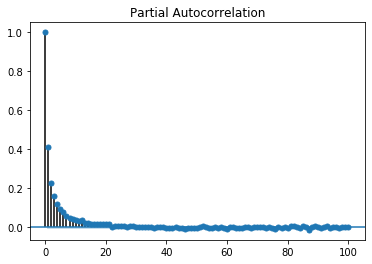

In [36]:
plot_pacf(df_mean3.CO2E_EMISSIONS_FACTOR,lags=100);

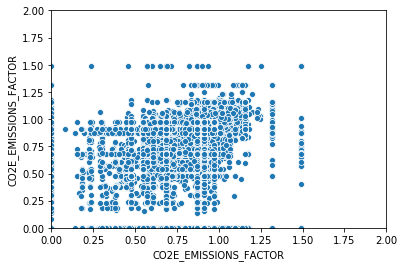

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.scatterplot(df_mean1.CO2E_EMISSIONS_FACTOR.shift(1), df_mean1.CO2E_EMISSIONS_FACTOR)
fig.set_xlim(0,2)
fig.set_ylim(0,2)
plt.figure;

In [8]:
df_DUID_CO2_price2 = df_DUID_CO2_price[(df_DUID_CO2_price.index > dt.datetime(2018,5,15)) &
                                       (df_DUID_CO2_price.index < dt.datetime(2018,6,1))]
df_DUID_CO2_price2.head()

,Price,CO2E_EMISSIONS_FACTOR,CO2_group
PeriodID,,,
2018-05-31 23:55:00,72.54360,0.605537,0.59672
2018-05-31 23:50:00,70.32848,0.912643,0.89508
2018-05-31 23:45:00,72.52576,0.908518,0.89508
2018-05-31 23:40:00,82.87810,0.608429,0.59672
2018-05-31 23:35:00,135.00004,0.694855,0.59672
